In [8]:
import torch
import torch.nn as nn
import torch.optim as op
from torch.optim import lr_scheduler
import torchvision
from torch.autograd import Variable
from torchvision import datasets, models
from torchvision import transforms as tr
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlob inline
import json

UsageError: Line magic function `%matplotlob` not found.


In [9]:
transform = tr.Compose([tr.Resize((224,224)),tr.ToTensor(),
                        tr.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])

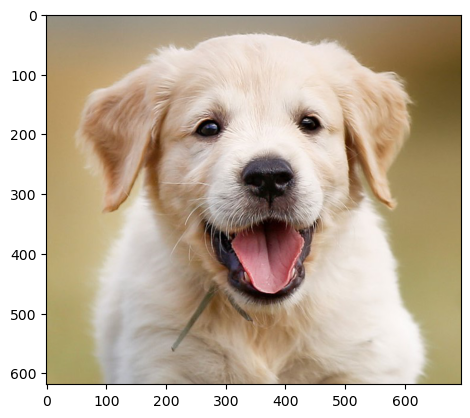

In [10]:
image = Image.open('dog.jpg')
plt.imshow(image)

In [11]:
vgg = models.vgg16(pretrained=True)

C:\Users\Mi\.conda\envs\conda_default_env_backup\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Mi\.conda\envs\conda_default_env_backup\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [12]:
CUDA = torch.cuda.is_available()
if CUDA:
    vgg = vgg.cuda()

In [13]:
# Apply the transforms on the image
image = transform(image)
print(image.shape)

torch.Size([3, 224, 224])


In [16]:
# add the batch size
image = image.unsqueeze(0)
image= Variable(image)
print(image.shape)

torch.Size([1, 3, 224, 224])


In [17]:
output= vgg(image)
print(output.shape)

torch.Size([1, 1000])


In [18]:
# Transfer the 2d Tensor to 1d
output = output.squeeze(0)
print(output.shape)

torch.Size([1000])


In [19]:

index = output.max(0)
print(index)

torch.return_types.max(
values=tensor(17.1163, grad_fn=<MaxBackward0>),
indices=tensor(207))


In [20]:
index = str(index[1][0].item())

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [ ]:
# continue on Visualizing the feature map